In [1]:
from google.colab import files

# This will open a file picker — upload Suicide_Detection.csv here
uploaded = files.upload()


Saving Suicide_Detection.csv to Suicide_Detection.csv


In [2]:
import pandas as pd

# Load the uploaded CSV
df = pd.read_csv('Suicide_Detection.csv')

# Check first 5 rows
df.head()


,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [3]:
# Dataset info
print("Shape:", df.shape)
print("\nColumns:", df.columns)

# Check for nulls
print("\nMissing values:\n", df.isnull().sum())

# Check class distribution
print("\nTarget label value counts:\n", df['class'].value_counts())

# Preview text samples
df[['text', 'class']].head()


Shape: (232074, 3)

Columns: Index(['Unnamed: 0', 'text', 'class'], dtype='object')

Missing values:
 Unnamed: 0    0
text          0
class         0
dtype: int64

Target label value counts:
 class
suicide        116037
non-suicide    116037
Name: count, dtype: int64


,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [4]:
import re
import string

# Clean text function
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r'\@w+|\#','', text)  # remove @mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove digits
    return text.strip()

# Apply cleaning
df['clean_text'] = df['text'].astype(str).apply(clean_text)

# Check result
df[['text', 'clean_text']].head()


,text,clean_text
0,Ex Wife Threatening SuicideRecently I left my ...,ex wife threatening suiciderecently i left my ...
1,Am I weird I don't get affected by compliments...,am i weird i dont get affected by compliments ...
2,Finally 2020 is almost over... So I can never ...,finally is almost over so i can never hear h...
3,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard
4,"I’m so lostHello, my name is Adam (16) and I’v...",im so losthello my name is adam and ive been ...


In [8]:
# Convert labels to numeric: suicide = 1, non-suicide = 0
df['label'] = df['class'].map({'suicide': 1, 'non-suicide': 0})

# Check label distribution
df['label'].value_counts()

,count
label,
1,116037
0,116037


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Split dataset
X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict
y_pred = model.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9337929548637294

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     23287
           1       0.94      0.93      0.93     23128

    accuracy                           0.93     46415
   macro avg       0.93      0.93      0.93     46415
weighted avg       0.93      0.93      0.93     46415



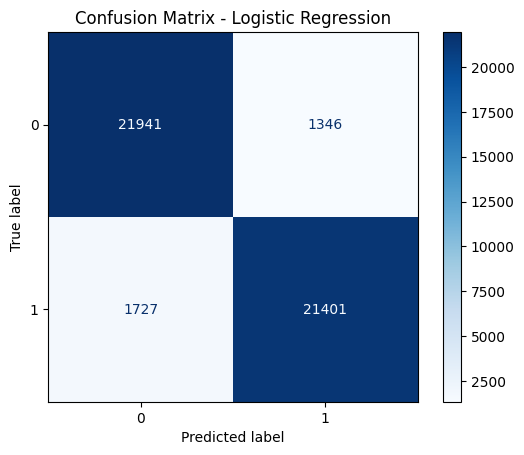

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test_tfidf, y_test, cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [15]:
!pip install wordcloud


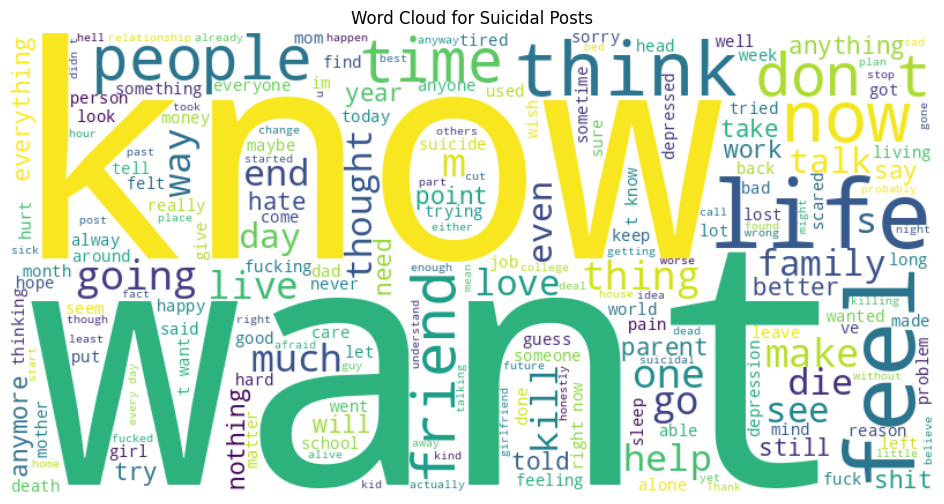

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all suicidal posts into one big string
suicidal_text = df[df['class'] == 'suicide']['text'].str.cat(sep=' ')

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(suicidal_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Suicidal Posts")
plt.show()

In [19]:
import pickle

# Save model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save TF-IDF vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

In [21]:
def predict_text(text):
    # Transform text with the same vectorizer
    text_vector = tfidf.transform([text])
    prediction = model.predict(text_vector)[0]

    if prediction == 1:
        return "🔴 This message is likely *suicidal*."
    else:
        return "🟢 This message is likely *not suicidal*."

# Example usage
test_input = input("Enter a message to check: ")
print(predict_text(test_input))

Enter a message to check: suicide
🔴 This message is likely *suicidal*.


In [22]:
!mkdir model
!mv model.pkl model/model.pkl
!mv vectorizer.pkl model/vectorizer.pkl
!zip -r mental-health-detector.zip model requirements.txt Suicide_Detection.csv


	zip warning: name not matched: requirements.txt
  adding: model/ (stored 0%)
  adding: model/vectorizer.pkl (deflated 58%)
  adding: model/model.pkl (deflated 10%)
  adding: Suicide_Detection.csv (deflated 63%)
